In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data= pd.read_csv(r"./dataset/Advertising.csv") 
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars) \
Radio: advertising dollars spent on Radio \
Newspaper: advertising dollars spent on Newspaper \
Sales: sales of a single product in a given market (in thousands of widgets)

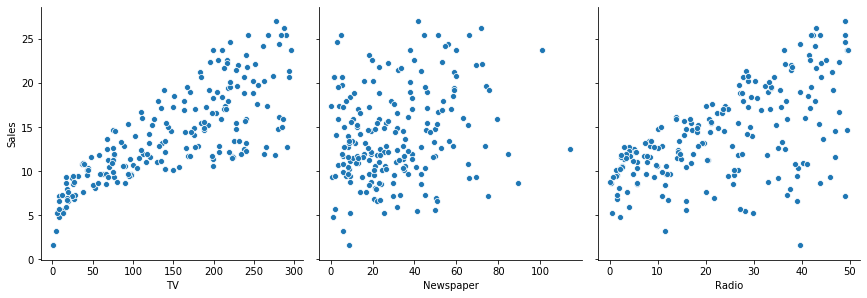

In [5]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

In [6]:
X = data['TV']
Y = data['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.3, random_state = 0)

In [7]:
X_train.shape

(140,)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1)) # 2차원으로 변형
print ("iNTERCEPT : ",lm.intercept_) # 절편
print ("CO-EFFICIENT : ",lm.coef_) # 기울기

iNTERCEPT :  [7.31081017]
CO-EFFICIENT :  [[0.04581434]]


y=β0+β1x

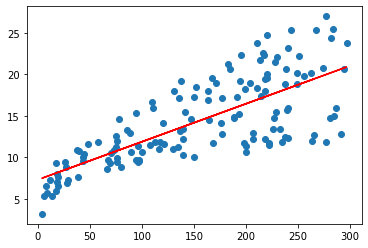

In [10]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 7.31081017 + 0.04581434*X_train, 'r')
plt.show()

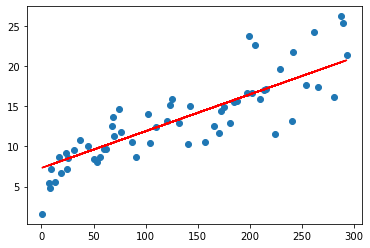

In [11]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 7.31081017 + 0.04581434*X_test, 'r')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
preds=lm.predict(X_test.values.reshape(-1,1))
print("최종 오차값:",sqrt(mean_squared_error(Y_test.values.reshape(-1,1),preds)))

최종 오차값: 2.7381525876883988


In [14]:
X = data.drop(['Sales'],axis=1)
Y = data['Sales']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.3, random_state = 0)

In [16]:
X_train.shape

(140, 3)

In [17]:
X_test.shape

(60, 3)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
print ("iNTERCEPT : ",lm.intercept_)
print ("CO-EFFICIENT : ",lm.coef_)

iNTERCEPT :  2.880255286331323
CO-EFFICIENT :  [0.04391531 0.20027962 0.00184368]


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
preds=lm.predict(X_test)
print("최종 오차값:",sqrt(mean_squared_error(Y_test,preds)))

최종 오차값: 1.7250444789917372


In [96]:
x_new=pd.DataFrame({'TV':[50],
                   'Newspaper':[50],
                   'Radio':[50]})
x_new

,TV,Newspaper,Radio
0,50,50,50


y=β0+β1×TV+β2×Radio+β3×Newspaper

In [97]:
new_pred=lm.predict(x_new)
new_pred

array([13.21819761])

In [95]:
data.iloc[0]['Sales']

22.1